<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2); line-height: 1.5;">
    <center style="color:white;font-size:35px;padding:15px"><b> ĐỒ ÁN CUỐI KỲ </b></center>
<center style="color:black;font-size:30px;padding:15px"><b> LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</b></center>
</div>


## Import các thu viện cần thiết

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Khám phá dữ liệu

### Đọc dữ liệu vào dataframe

In [2]:
df = pd.read_csv('../Data/who_life_exp.csv')

In [3]:
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


## 2. Tiền xử lí dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

#### Tỉ lệ (%) giá trị thiếu của mỗi cột là bao nhiêu? Mỗi cột có bao nhiêu giá trị khác nhau? Hiển thị 1 vài giá trị

In [4]:
pd.set_option('display.max_colwidth', 100) # Dễ xem
pd.set_option('display.max_columns', None) # Dễ xem

In [5]:
cat_col_info_df = df.select_dtypes(exclude=[np.number])

# Hàm tính tỉ lệ giá trị thiếu
# Lấy số giá trị thiếu chia cho số dòng của mỗi cột
def missing_ratio(column):
    return ((column.isnull().sum() / column.shape[0]) * 100).round(1)

# Hàm tính số lượng giá trị khác nhau
def num_diff_values(column):
    return column.nunique()

# Hàm trả về các giá trị khác nhau
def diff_vals(column):
    return column.dropna().unique()

# Hiển thị
cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_diff_values, diff_vals])
cat_col_info_df

,country,country_code,region
missing_ratio,0.0,0.0,0.0
num_diff_values,183,183,6
diff_vals,"[Angola, Burundi, Benin, Burkina Faso, Botswana, Central African Republic, United Republic of Ta...","[AGO, BDI, BEN, BFA, BWA, CAF, TZA, UGA, ZAF, ZMB, ZWE, SSD, STP, SWZ, SYC, TCD, TGO, NAM, NER, ...","[Africa, Americas, Eastern Mediterranean, Europe, South-East Asia, Western Pacific]"


Không có gì bất thường ở đây cả!

#### Trực quan tần suất xuất hiện của các khu vực (region) trong dữ liệu 

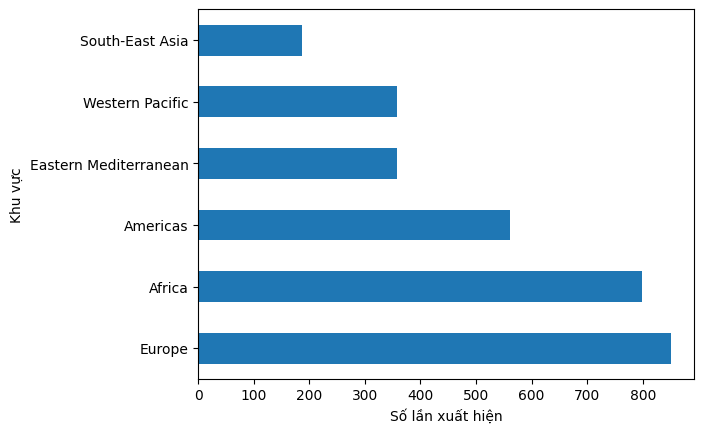

In [10]:
df['region'].value_counts().plot.barh()
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Khu vực')
plt.show()